# Mario Enrique Pisquiy Gomez
### Carné 20200399

## Importación de librerías

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import BaggingRegressor
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline

## Carga de la data

In [2]:
data = pd.read_csv('train.csv')

## Exploración de la data

In [3]:
data.columns

Index(['model', 'year', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg',
       'engineSize', 'make', 'price'],
      dtype='object')

In [4]:
data.dtypes

model            object
year              int64
transmission     object
mileage           int64
fuelType         object
tax             float64
mpg             float64
engineSize      float64
make             object
price             int64
dtype: object

In [5]:
data.describe()

,year,mileage,tax,mpg,engineSize,price
count,75978.000000,75978.000000,69449.000000,69449.00000,75978.000000,75978.000000
mean,2017.100319,22967.622983,120.572362,55.19451,1.663712,16925.649543
std,2.127747,21024.729721,63.192927,16.46193,0.555865,9728.759207
min,1970.000000,1.000000,0.000000,0.30000,0.000000,450.000000
25%,2016.000000,7470.250000,125.000000,47.00000,1.200000,10277.000000
50%,2017.000000,17265.500000,145.000000,54.30000,1.600000,14750.000000
75%,2019.000000,32221.500000,145.000000,62.80000,2.000000,20980.000000
max,2060.000000,323000.000000,580.000000,470.80000,6.600000,149948.000000


In [6]:
data.head()

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,make,price
0,Polo,2017,Manual,36874,Petrol,20.0,60.1,1.2,vw,10250
1,Fabia,2016,Manual,39386,Petrol,20.0,60.1,1.2,skoda,8250
2,Grandland X,2018,Automatic,8935,Diesel,145.0,57.7,1.5,vauxhall,16299
3,Fiesta,2016,Manual,18606,Petrol,20.0,62.8,1.0,ford,10199
4,Octavia,2015,Manual,26000,Diesel,30.0,61.4,2.0,skoda,12790


In [7]:
data.isna().sum()

model              0
year               0
transmission       0
mileage            0
fuelType           0
tax             6529
mpg             6529
engineSize         0
make               0
price              0
dtype: int64

In [8]:
data = data.dropna()

##### De las variables categoricas se busca encontrar el número de valores únicos

In [9]:
data.model.nunique()

192

In [10]:
data.make.nunique()

9

In [11]:
data.fuelType.nunique()

5

In [12]:
data.transmission.nunique()

4

array([[<AxesSubplot: title={'center': 'year'}>,
        <AxesSubplot: title={'center': 'mileage'}>],
       [<AxesSubplot: title={'center': 'tax'}>,
        <AxesSubplot: title={'center': 'mpg'}>],
       [<AxesSubplot: title={'center': 'engineSize'}>,
        <AxesSubplot: title={'center': 'price'}>]], dtype=object)

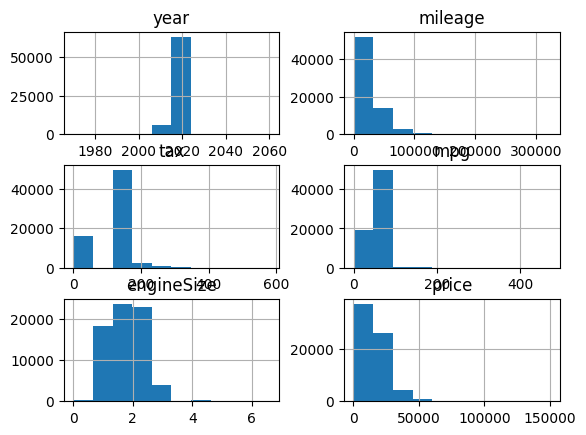

In [13]:
data.hist()

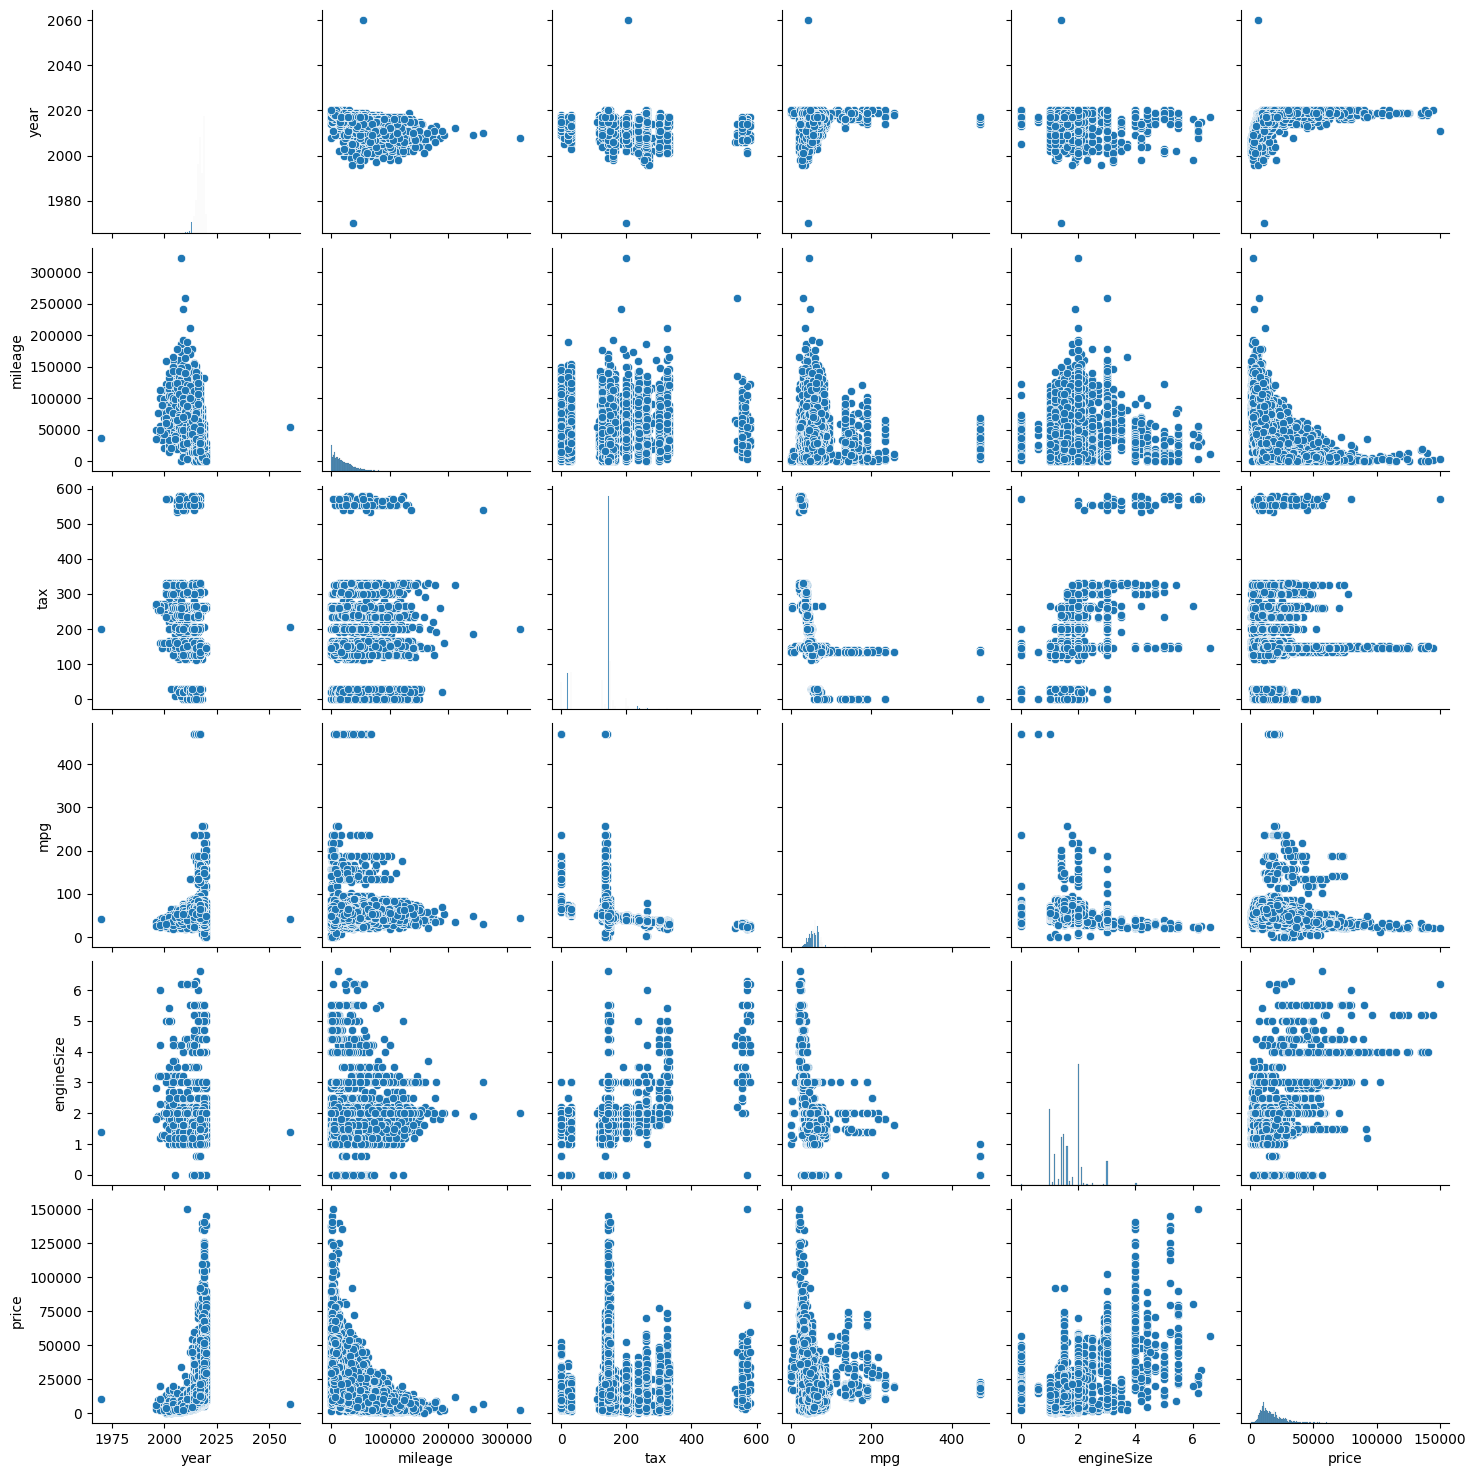

In [14]:
sns.pairplot(data)

<Figure size 400x400 with 0 Axes>

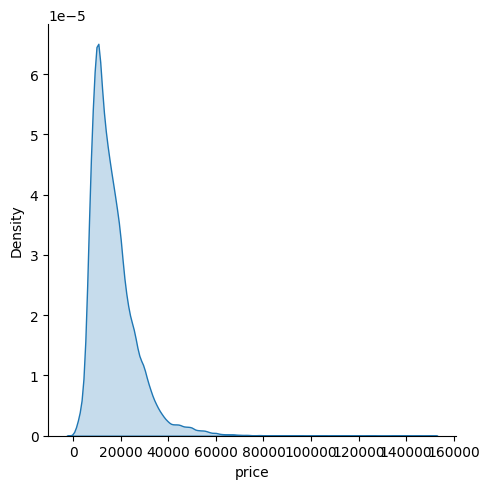

In [15]:
plt.figure(figsize=(4,4))
sns.displot(data = data, x = 'price', kind='kde', fill=True)
plt.show()

<Figure size 400x400 with 0 Axes>

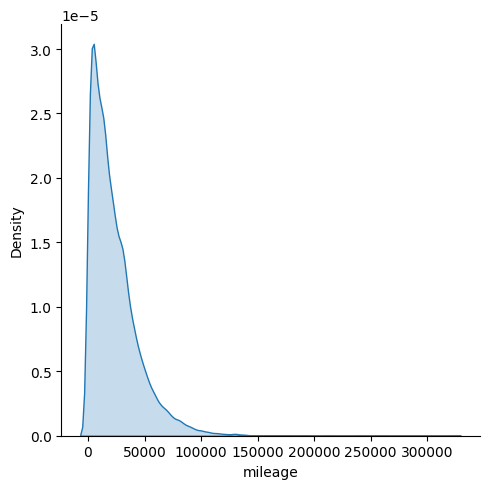

In [16]:
plt.figure(figsize=(4,4))
sns.displot(data = data, x = 'mileage', kind='kde', fill=True)
plt.show()

<Figure size 400x400 with 0 Axes>

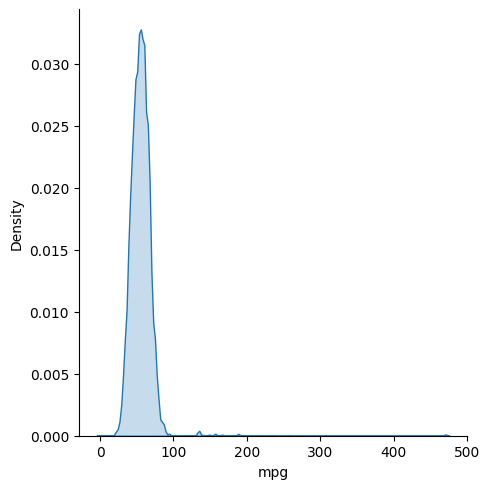

In [17]:
plt.figure(figsize=(4,4))
sns.displot(data = data, x = 'mpg', kind='kde', fill=True)
plt.show()

<Figure size 400x400 with 0 Axes>

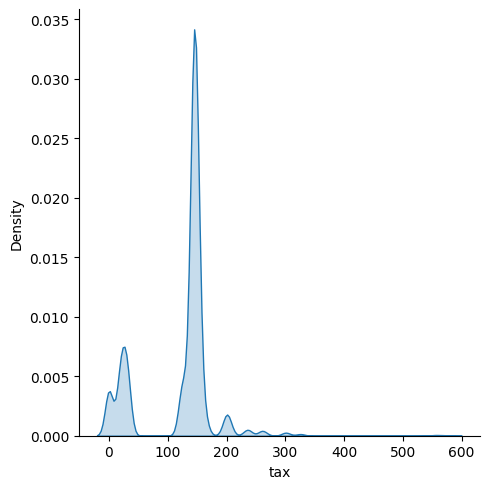

In [18]:
plt.figure(figsize=(4,4))
sns.displot(data = data, x = 'tax', kind='kde', fill=True)
plt.show()

## Split Data

In [19]:
y = data.price
data = data.drop(columns=['model','price'])

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(data, y, test_size=0.30, random_state=100)

## Normalización de la data y one hot encoding

In [53]:
num_pipeline = Pipeline([
                            ('std_scaler', StandardScaler()),
                            ('simple_imputer', SimpleImputer(missing_values=np.nan, strategy='mean'))
                        ])

In [54]:
cat_pipeline = Pipeline([
                        ('oh_enc', OneHotEncoder(drop='first')),
                        ])

In [55]:
num_attribs = data.select_dtypes(include='number').columns
cat_attribs = data.select_dtypes(exclude='number').columns

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs),
    ])

## Modelo

In [52]:
predictor=RandomForestRegressor()
model_pip = Pipeline([('col_transform', full_pipeline),
                      ('model', predictor)])

In [101]:
AdaBoostRegressor(n_estimators=100, learning_rate=1, loss='linear')
params_model = [{'model': [AdaBoostRegressor()],
                 'model__n_estimators':[50,100,150,200],
                 'model__learning_rate': [1,3,5],
                 'model__loss': ['linear','square','exponential'],
                 'model__random_state': [42]},

                {'model': [RandomForestRegressor()],
                 'model__n_estimators':[30,50,100,150,200],
                 'model__max_depth':[5,10,15,20],
                 'model__random_state':[42],
                 'model__n_jobs':[-1]},

                {'model': [BaggingRegressor()],
                 'model__estimator': [DecisionTreeRegressor()],
                 'model__n_estimators':[30,50,100,150,200],
                 'model__bootstrap': [True],
                 'model__random_state':[42],
                 'model__n_jobs':[-1]}
]
grid_model = GridSearchCV(model_pip,params_model,cv=5,scoring='neg_mean_absolute_error',n_jobs=-1)

In [102]:
entrenador = grid_model.fit(X_train,y_train)
print('Mejores modelo:', grid_model.best_params_)

Mejores modelo: {'model': RandomForestRegressor(max_depth=20, n_estimators=200, n_jobs=-1,
                      random_state=42), 'model__max_depth': 20, 'model__n_estimators': 200, 'model__n_jobs': -1, 'model__random_state': 42}


In [103]:
full_pipeline_with_predictor = Pipeline([
        ("preparation", full_pipeline),
        ("adaboost_reg", RandomForestRegressor(max_depth=20, n_estimators=200, n_jobs=-1, random_state=42))
])

In [104]:
full_pipeline_with_predictor.fit(X_train, y_train)

Pipeline(steps=[('preparation',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('std_scaler',
                                                                   StandardScaler()),
                                                                  ('simple_imputer',
                                                                   SimpleImputer())]),
                                                  Index(['year', 'mileage', 'tax', 'mpg', 'engineSize'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('oh_enc',
                                                                   OneHotEncoder(drop='first'))]),
                                                  Index(['transmission', 'fuelType', 'make'], dtype='object'))])),
                ('adaboost_reg',
                 RandomForestRegressor(max_depth=20, n_estimators=200,
                                       n_jobs=-1, random_state=42))])

In [105]:
final_predictions = full_pipeline_with_predictor.predict(X_valid)

final_mse = mean_squared_error(y_valid, final_predictions)
final_mse

6465987.393512037

## Test del modelo

In [106]:
data_test = pd.read_csv('Test.csv')

In [107]:
ids_solution = data_test.id
# Se elimina del dataset
data_test.drop('id',axis=1,inplace=True)
data_test.drop('model',axis=1,inplace=True)

In [108]:
preds_solution = full_pipeline_with_predictor.predict(data_test)

In [109]:
preds_solution.shape

(32562,)

In [110]:
# Creación de un array vacío para generar el csv final
solution_array = []

# For que recorre el array de ids y de las predicciones realizadas para crear el array de soluciones
for i in range(0, len(ids_solution)):
    solution_array1 = [ids_solution[i],preds_solution[i]]
    solution_array.append(solution_array1)

In [111]:
solution = pd.DataFrame(solution_array, columns = ['id','price'])
solution.head(3)

,id,price
0,1,25115.162298
1,2,8916.613248
2,3,18857.053029


In [112]:
solution.to_csv('solutions.csv',index=False,sep=',')